# Insights on the Effects of Credit Score, Being a House Owner & Income on Borrower Rates on Loans
## by Christopher Agomuo

## Investigation Overview

In this investing, I sought to examine certain metrics that could be used to determine the borrower interest rates on loans. The key metrics considered in this investigation includes: credit score, owning a home and monthly income.

## Dataset Overview

The data is an extensive file highlighting the approved loans of approximately 115,000 loanees. The dataset consisted of 81 variables but only 11 were chosen for this analysis. The key variables selected for this project include but not limited to the following: credit grade, borrower rate, is borrower homeowner, stated_monthly_income etc. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
np.random.seed(100)

In [3]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

In [4]:
df = loan_data.iloc[:, [3,4,7,8,14,17,19,21,49,63,65]]

In [5]:
df[['BorrowerState', 'EmploymentStatus', 'LoanOriginationQuarter']] = df[['BorrowerState', 'EmploymentStatus', 'LoanOriginationQuarter']].apply(pd.Categorical)

In [6]:
ordered_cat = {'CreditGrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'], 
              'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']}

for col in ordered_cat:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                               categories = ordered_cat[col])
    df[col] = df[col].astype(ordered_var)

In [7]:
df.rename(columns={'CreditGrade': 'credit_grade', 'Term': 'term', 'BorrowerAPR': 'borrower_apr', 'BorrowerRate': 'borrower_rate', 
                  'ProsperRating (Alpha)': 'prosper_rating', 'BorrowerState': 'borrower_state', 'EmploymentStatus': 'employment_status', 
                  'IsBorrowerHomeowner': 'is_borrower_homeowner', 'StatedMonthlyIncome': 'stated_monthly_income', 'LoanOriginalAmount': 
                  'loan_original_amount', 'LoanOriginationQuarter': 'loan_origination_quarter'}, inplace=True)

## Distribution of Borrower Interest Rates

Interest rate in this dataset take on a very extensive range of values, Plotted on a logarithmic scale, the distribution of Borrower Interest Rates take the shape of a left skewed distribution with a peak rate between 0.3 & 0.4.

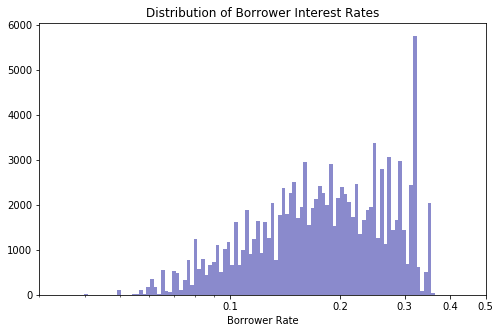

In [8]:
plt.figure(figsize=[8, 5])

width = df['borrower_rate'].max()
bins = 10 ** np.arange(-4, np.log10(width)+0.01, 0.01)
colors = sb.light_palette('navy')[2]
plt.hist(data=df, x='borrower_rate', bins=bins, color=colors)
plt.title('Distribution of Borrower Interest Rates')
plt.xscale('log')
ticks=[0.1,0.2,0.3,0.4,0.5]
plt.xticks(ticks, ticks)
plt.xlabel('Borrower Rate')
plt.xlim(0.03, 0.5);

## Prosper Rating & Employment Status by Borrower Rate

There is a strong negative relationship between Prosper rating and Borrower Rate. As the prosper credit rating increases, the borrower rate reduces. the decrease is steady and consistent and depicts that loanees with good prosper rating are more likely to pay less interest on their loans.

With respect to the relationship between borrower rate and employment status, the plot shows a average relationship. Although, for borrowers who are unemployed, the plot hightlights that their median borrower rate is higher than those of their counterparts.

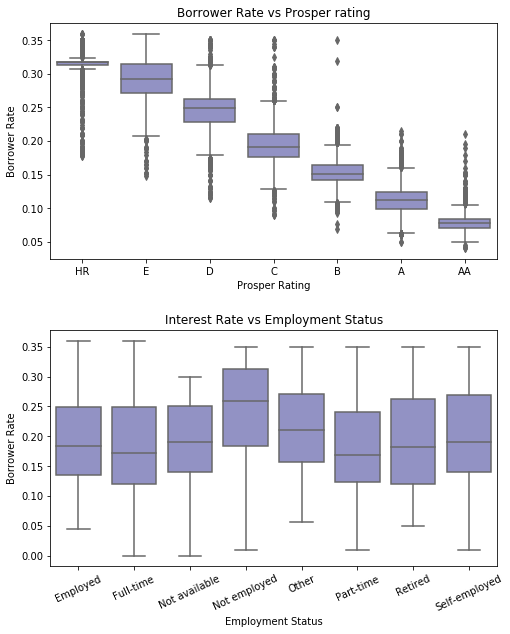

In [9]:
plt.figure(figsize=[8, 10])
colors = sb.light_palette('navy')[2]

plt.subplot(2,1,1)
sb.boxplot(data=df, x='prosper_rating', y='borrower_rate', color=colors)
plt.title('Borrower Rate vs Prosper rating')
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower Rate')

plt.subplot(2,1,2)
sb.boxplot(data=df, x='employment_status', y='borrower_rate', color=colors)
plt.title('Interest Rate vs Employment Status')
plt.xticks(rotation=25)
plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate')

plt.subplots_adjust(hspace=0.3)

## Borrower Rate by Homeowner and Stated Monthly Income

While investigating further to obtain more insights on the interaction between borrower rate, homeowner and stated monthly income, the only notable discovery is that some Borrowers who don't own a home have higher borrower rates than their counterparts.


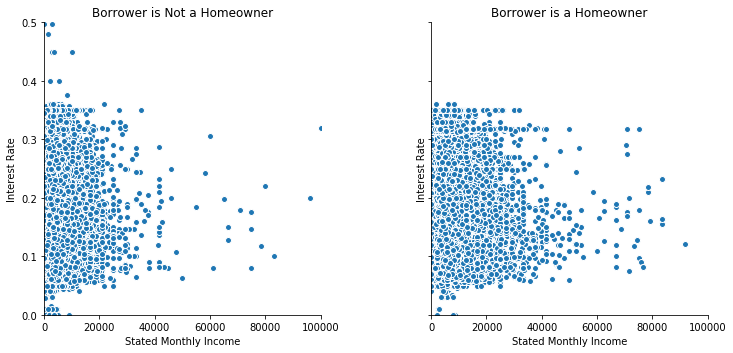

In [10]:
g = sb.FacetGrid(df, col='is_borrower_homeowner', height= 5)
g.map(plt.scatter, 'stated_monthly_income', 'borrower_rate', edgecolor ='w')
g.add_legend()
plt.ylim(0, 0.5)
axes = g.axes.flatten()
axes[0].set_title('Borrower is Not a Homeowner')
axes[1].set_title('Borrower is a Homeowner')
plt.subplots_adjust(wspace=0.4)

for ax in axes:
    ax.set_xlabel('Stated Monthly Income')
    ax.set_ylabel('Interest Rate')
plt.ylabel('Interest Rate')
plt.xlim(0, 100000);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle